In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import scipy.stats as st
import os
import glob

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor 
from DR_analysis_utils import compute_smoothed_response_rate, compute_block_modulation

%matplotlib notebook

In [5]:
main_paths = [
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220816\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220817\processed",
    
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230123\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230124\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230125\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230126\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230130\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230131\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230201\processed", 
    r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644864_20230202\processed",
#     r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644866_20230207\processed", 
    r"Y:\DRpilot_644866_20230208\processed",
    r"Y:\DRpilot_644866_20230209\processed",
    r"Y:\DRpilot_644866_20230210\processed",
    r"Y:\DRpilot_644867_20230220\processed",
    r"Y:\DRpilot_644867_20230221\processed",
    r"Y:\DRpilot_644867_20230222\processed",
    r"Y:\DRpilot_644867_20230223\processed",
    r"Y:\DRpilot_649943_20230213\processed", 
    r"Y:\DRpilot_649943_20230214\processed",
    r"Y:\DRpilot_649943_20230215\processed",
    r"Y:\DRpilot_649943_20230216\processed",   
]


In [6]:
# load sessions + facemap info
sessions={}
keep_n_SVDs=50

for mi,mm in enumerate(main_paths):
    sessions[mi]=Session(path=mm)
    sessions[mi].assign_unit_areas()
    sessions[mi]=compute_smoothed_response_rate(sessions[mi])
    
    behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
    cam_frames_path = os.path.join(mm,"camera_frames.pkl")
    
    behav_info=np.load(behav_path,allow_pickle=True)
    with open(cam_frames_path, 'rb') as filepath:
        cam_frames=pickle.load(filepath)
        
    sessions[mi].cam_frames=cam_frames
    sessions[mi].facemap_info={}
    sessions[mi].facemap_info['avgframe_reshape']=behav_info.item()['avgframe_reshape']
    sessions[mi].facemap_info['avgmotion_reshape']=behav_info.item()['avgmotion_reshape']
    sessions[mi].facemap_info['motion']=behav_info.item()['motion'][1]
    sessions[mi].facemap_info['motMask_reshape']=behav_info.item()['motMask_reshape'][1][:,:,:keep_n_SVDs]
#     sessions[mi].facemap_info['movMask_reshape']=behav_info.item()['movMask_reshape']
    sessions[mi].facemap_info['motSVD']=behav_info.item()['motSVD'][1][:,:keep_n_SVDs]
#     sessions[mi].facemap_info[]=behav_info.item()

    

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas not found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

In [7]:
# also load decoding analysis results

loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\by_session\use_25_units'

svc_results={}
decoder_results=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results[ii]=pickle.load(handle)
    print(ff)
    

626791_1decoder_results_200ms_incl_pre_post_all_units.pkl
626791_2decoder_results_200ms_incl_pre_post_all_units.pkl
626791_3decoder_results_200ms_incl_pre_post_all_units.pkl
636766_1decoder_results_200ms_incl_pre_post_all_units.pkl
636766_2decoder_results_200ms_incl_pre_post_all_units.pkl
636766_3decoder_results_200ms_incl_pre_post_all_units.pkl
636766_4decoder_results_200ms_incl_pre_post_all_units.pkl
644864_1decoder_results_200ms_incl_pre_post_all_units.pkl
644864_2decoder_results_200ms_incl_pre_post_all_units.pkl
644864_3decoder_results_200ms_incl_pre_post_all_units.pkl
644864_4decoder_results_200ms_incl_pre_post_all_units.pkl
644866_2decoder_results_200ms_incl_pre_post_all_units.pkl
644866_3decoder_results_200ms_incl_pre_post_all_units.pkl
644866_4decoder_results_200ms_incl_pre_post_all_units.pkl
644867_1decoder_results_200ms_incl_pre_post_all_units.pkl
644867_2decoder_results_200ms_incl_pre_post_all_units.pkl
644867_3decoder_results_200ms_incl_pre_post_all_units.pkl
644867_4decode

In [8]:
session_areas=[]
p='block_ids'
for sel_session in range(0,len(svc_results)):
    session_areas.append(list(svc_results[sel_session][p].keys()))
    
unique_areas=np.unique(np.hstack(session_areas))
unique_areas

array(['', 'ACB', 'AId', 'APN', 'AUDp', 'AUDpo', 'CA1', 'CA3', 'CL', 'CP',
       'DG', 'ILA', 'LD', 'LGd', 'LP', 'LSr', 'MB', 'MGd', 'MGm', 'MGv',
       'MOp', 'MOs', 'MRN', 'ORBm', 'PO', 'POL', 'PoT', 'ProS', 'RSPagl',
       'RSPd', 'RSPv', 'SAG', 'SGN', 'SNr', 'SSp-bfd', 'SSp-m', 'SSp-tr',
       'SSp-ul', 'SSp-un', 'SUB', 'TEa', 'VISa', 'VISal', 'VISam', 'VISl',
       'VISli', 'VISp', 'VISpm', 'VISpor', 'VISrl', 'VPL', 'VPM', 'all'],
      dtype='<U7')

In [195]:
# make into more plottable format

####change this to deal with multiple #s of trials and average over re-runs of the SVC

plot_results={}
plot_shuffle_results={}
predict_perf={}
predict_perf_shuffle={}
predict_perf_tridx={}
dec_func={}
dec_func_shuffle={}

timepoints=svc_results[0]['time_bins'][1:]

label_list=['vis1','vis2','sound1','sound2','True','False']
# label_list=['vis1','sound1','True','False']

# predict=['stim_ids','block_ids','trial_response']
predict=['block_ids']

# areas=['VISp','AUD','LG','MG','MOs','MRN','CP','MOp']
areas=unique_areas

for sel_session in range(0,len(svc_results)):
    plot_results[sel_session]={}
    plot_shuffle_results[sel_session]={}
    for aa in areas:
        plot_results[sel_session][aa]={}
        plot_shuffle_results[sel_session][aa]={}
        for p in predict:
            plot_results[sel_session][aa][p]={}
            plot_shuffle_results[sel_session][aa][p]={}
            for ll in label_list:
                plot_results[sel_session][aa][p][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                plot_results[sel_session][aa][p][ll][:]=np.nan
                
                plot_shuffle_results[sel_session][aa][p][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                plot_shuffle_results[sel_session][aa][p][ll][:]=np.nan

decoder_acc_session_mean = {}
decoder_acc_session_shuffle_mean = {}
for aa in areas:
    decoder_acc_session_mean[aa]={}
    decoder_acc_session_shuffle_mean[aa]={}
    for p in predict:
        decoder_acc_session_mean[aa][p]={}
        decoder_acc_session_shuffle_mean[aa][p]={}
        for ll in label_list:
            
            decoder_acc_session_mean[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(svc_results)))
            decoder_acc_session_mean[aa][p][ll][:]=np.nan
            
            decoder_acc_session_shuffle_mean[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(svc_results)))
            decoder_acc_session_shuffle_mean[aa][p][ll][:]=np.nan
        
                
for sel_session in range(0,len(svc_results)):
    for p in predict:
        for aa in areas: 
            if aa in svc_results[sel_session][p].keys():
                for tt,tp in enumerate(timepoints):
                    for nn in range(0,svc_results[sel_session]['n_repeats']):
                        for ll in label_list:
                            if len(svc_results[sel_session][p][aa])>0:
                                if len(svc_results[sel_session][p][aa][tt])>0:
                                    if ll in svc_results[sel_session][p][aa][tt][nn]['cr'].keys():
                                        temp_perf=np.nanmean(svc_results[sel_session][p]
                                                          [aa][tt][nn]['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_results[sel_session][aa][p][ll][tt,nn]=temp_perf
                                        
                                        temp_shuff_perf=np.nanmean(svc_results[sel_session][p]
                                                          [aa][tt][nn]['shuffle']['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_shuffle_results[sel_session][aa][p][ll][tt,nn]=temp_shuff_perf

                    for ll in label_list:
                        if len(svc_results[sel_session][p][aa])>0:                    
                            decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
                            decoder_acc_session_mean[aa][p][ll][tt,sel_session] = decoder_acc_mean
    
                            decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
                            decoder_acc_session_shuffle_mean[aa][p][ll][tt,sel_session] = decoder_acc_shuffle_mean
    
    
for sel_session in range(0,len(svc_results)):
    predict_perf[sel_session]={}
    predict_perf_shuffle[sel_session]={}
    predict_perf_tridx[sel_session]={}
    dec_func[sel_session]={}
    dec_func_shuffle[sel_session]={}
    for aa in areas:
        if aa in svc_results[sel_session][p].keys():
            predict_perf[sel_session][aa]={}
            predict_perf_shuffle[sel_session][aa]={}
            predict_perf_tridx[sel_session][aa]={}
            dec_func[sel_session][aa]={}
            dec_func_shuffle[sel_session][aa]={}
            for p in predict:
                predict_perf[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                predict_perf_shuffle[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                predict_perf_tridx[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                
                if 'decision_function' in svc_results[sel_session][p][aa][0][0].keys():
                    dec_func[sel_session][aa][p]=svc_results[sel_session][p][aa][0][0]['decision_function']
                    dec_func_shuffle[sel_session][aa][p]=svc_results[sel_session][p][aa][0][0]['shuffle']['decision_function']
                    

    sessions[sel_session].decoder={}
    sessions[sel_session].decoder['dec_func']=dec_func[sel_session]
    sessions[sel_session].decoder['dec_func_shuffle']=dec_func_shuffle[sel_session]

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:84: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\4215285585.py:81: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\T

In [10]:
#load decoding facemap results

loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\use_video\use_50_SVD_features'

svc_results_face={}
decoder_results_face=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results_face):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results_face[ii]=pickle.load(handle)
    print(ff)

626791_1decoder_results_50SVD_features.pkl
626791_2decoder_results_50SVD_features.pkl
626791_3decoder_results_50SVD_features.pkl
636766_1decoder_results_50SVD_features.pkl
636766_2decoder_results_50SVD_features.pkl
636766_3decoder_results_50SVD_features.pkl
636766_4decoder_results_50SVD_features.pkl
644864_1decoder_results_50SVD_features.pkl
644864_2decoder_results_50SVD_features.pkl
644864_3decoder_results_50SVD_features.pkl
644864_4decoder_results_50SVD_features.pkl
644866_2decoder_results_50SVD_features.pkl
644866_3decoder_results_50SVD_features.pkl
644866_4decoder_results_50SVD_features.pkl
644867_1decoder_results_50SVD_features.pkl
644867_2decoder_results_50SVD_features.pkl
644867_3decoder_results_50SVD_features.pkl
644867_4decoder_results_50SVD_features.pkl
649943_1decoder_results_50SVD_features.pkl
649943_2decoder_results_50SVD_features.pkl
649943_3decoder_results_50SVD_features.pkl
649943_4decoder_results_50SVD_features.pkl


In [81]:
# make into more plottable format

####change this to deal with multiple #s of trials and average over re-runs of the SVC

plot_results_face={}
plot_shuffle_results_face={}

timepoints=svc_results_face[0]['time_bins']
n_repeats=svc_results_face[0]['n_repeats']

label_list=['vis1','vis2','sound1','sound2','True','False']
# label_list=['vis1','sound1','True','False']

# predict=['stim_ids','block_ids','trial_response']
predict=['block_ids']

# areas=['VISp','AUD','LG','MG','MOs','MRN','CP','MOp']
# areas=all_areas
areas=[0]

for sel_session in range(0,len(svc_results_face)):
    plot_results_face[sel_session]={}
    plot_shuffle_results_face[sel_session]={}
    for aa in areas:
        plot_results_face[sel_session][aa]={}
        plot_shuffle_results_face[sel_session][aa]={}
        for p in predict:
            plot_results_face[sel_session][aa][p]={}
            plot_shuffle_results_face[sel_session][aa][p]={}
            for ll in label_list:
                plot_results_face[sel_session][aa][p][ll]=np.zeros((len(timepoints),n_repeats))
                plot_results_face[sel_session][aa][p][ll][:]=np.nan
                
                plot_shuffle_results_face[sel_session][aa][p][ll]=np.zeros((len(timepoints),n_repeats))
                plot_shuffle_results_face[sel_session][aa][p][ll][:]=np.nan

    
# diff table for each timepoint?
# row = session
# columns = ['modality','A_vis','A_aud','B_vis','B_aud','C_vis','C_aud','F_vis','F_aud',]

decoder_acc_session_mean_face = {}
decoder_acc_session_shuffle_mean_face = {}
for aa in areas:
    decoder_acc_session_mean_face[aa]={}
    decoder_acc_session_shuffle_mean_face[aa]={}
    for p in predict:
        decoder_acc_session_mean_face[aa][p]={}
        decoder_acc_session_shuffle_mean_face[aa][p]={}
        for ll in label_list:
            
            decoder_acc_session_mean_face[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(main_paths)))
            decoder_acc_session_mean_face[aa][p][ll][:]=np.nan
            
            decoder_acc_session_shuffle_mean_face[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(main_paths)))
            decoder_acc_session_shuffle_mean_face[aa][p][ll][:]=np.nan
        

for sel_session in range(0,len(svc_results_face)):
    for p in predict:
        for aa in areas: 
            if aa in svc_results_face[sel_session][p].keys():
                for tt,tp in enumerate(timepoints):
                    for nn in range(0,n_repeats):
                        for ll in label_list:
                            if len(svc_results_face[sel_session][p][aa])>0:
                                if len(svc_results_face[sel_session][p][aa][tt])>0:
                                    if ll in svc_results_face[sel_session][p][aa][tt][nn]['cr'].keys():
                                        temp_perf=np.nanmean(svc_results_face[sel_session][p]
                                                          [aa][tt][nn]['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_results_face[sel_session][aa][p][ll][tt,nn]=temp_perf
                                        
                                        temp_shuff_perf=np.nanmean(svc_results_face[sel_session][p]
                                                          [aa][tt][nn]['shuffle']['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_shuffle_results_face[sel_session][aa][p][ll][tt,nn]=temp_shuff_perf

                    for ll in label_list:
                        if len(svc_results_face[sel_session][p][aa])>0:                    
                            decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][p][ll][tt])
                            decoder_acc_session_mean_face[aa][p][ll][tt,sel_session] = decoder_acc_mean_face
    
                            decoder_acc_shuffle_mean_face = np.nanmean(plot_shuffle_results_face[sel_session][aa][p][ll][tt])
                            decoder_acc_session_shuffle_mean_face[aa][p][ll][tt,sel_session] = decoder_acc_shuffle_mean_face
            
for sel_session in range(0,len(svc_results_face)):
    predict_perf[sel_session]={}
    predict_perf_shuffle[sel_session]={}
    predict_perf_tridx[sel_session]={}
    dec_func[sel_session]={}
    dec_func_shuffle[sel_session]={}
    for aa in areas:
        if aa in svc_results_face[sel_session][predict[0]].keys():
            predict_perf[sel_session][aa]={}
            predict_perf_shuffle[sel_session][aa]={}
            predict_perf_tridx[sel_session][aa]={}
            dec_func[sel_session][aa]={}
            dec_func_shuffle[sel_session][aa]={}
            if len(svc_results_face[sel_session][p][aa][0])>0:
                for p in predict:
                    predict_perf[sel_session][aa][p]=np.zeros(
                        (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))
                    predict_perf_shuffle[sel_session][aa][p]=np.zeros(
                        (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))
                    predict_perf_tridx[sel_session][aa][p]=np.zeros(
                        (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))

                    if 'decision_function' in svc_results_face[sel_session][p][aa][0][0].keys():
                        dec_func[sel_session][aa][p]=svc_results_face[sel_session][p][aa][0][0]['decision_function']
                        dec_func_shuffle[sel_session][aa][p]=svc_results_face[sel_session][p][aa][0][0]['shuffle']['decision_function']
                    

    sessions[sel_session].decoder_face={}
    sessions[sel_session].decoder_face['dec_func']=dec_func[sel_session]
    sessions[sel_session].decoder_face['dec_func_shuffle']=dec_func_shuffle[sel_session]          

# plot_results[area][label/stimulus][timepoint_idx][ntrials_idx,nunits_idx,n_repeats]

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\3964049444.py:83: RuntimeWarning: Mean of empty slice
  decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\3964049444.py:86: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean_face = np.nanmean(plot_shuffle_results_face[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\3964049444.py:83: RuntimeWarning: Mean of empty slice
  decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\3964049444.py:86: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean_face = np.nanmean(plot_shuffle_results_face[sel_session][aa][p][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\3964049444.py:83: RuntimeWarning: Mean of empty slice
  decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][

In [84]:
# svc_results_face[sel_session][p][aa][0]

In [83]:
# sel_session

In [82]:
# svc_results_face[0]['block_ids'][0][0][0]['pred_label']
# aa

In [89]:
# plot_results[sel_session]
sessions[sel_session].decoder_face['dec_func'][0]['block_ids']


array([ 2.48836288e-01,  4.65040429e-01, -1.62484538e+00, -1.63913847e-01,
       -2.51896943e-01, -4.59702195e-01,  5.83847681e-02, -6.97455279e-01,
       -3.87163028e-01, -1.23719660e+00, -1.58283537e+00, -1.46748855e+00,
       -8.55160244e-01, -6.34036614e-01, -8.70057230e-01, -1.39094227e+00,
       -8.53948754e-01, -1.13965183e+00, -1.15827593e+00, -6.52269146e-01,
       -8.94104760e-01, -1.22413205e+00, -9.79136629e-01, -3.02399485e-01,
       -6.40495609e-01, -3.32380763e-01, -8.23145443e-01,  2.50855360e-01,
       -6.95093548e-01, -5.97084278e-01, -8.05614781e-01, -4.28276680e-01,
       -9.30063403e-01,  4.38997162e-01, -9.56785805e-01, -5.18440407e-01,
       -2.47584220e-01, -5.11857005e-01, -3.19039495e-01, -9.48476545e-01,
       -9.73247343e-01, -8.35125693e-01, -5.46218478e-01, -1.12403411e+00,
       -6.62917076e-01, -5.57674830e-01, -1.04963422e+00, -5.66891859e-01,
       -5.52565240e-01, -6.18392035e-01, -7.26803312e-01, -6.70812853e-01,
       -1.76515264e-01, -

In [33]:
# svc_results_face[sel_session][p][aa][tt][nn]

In [34]:
#calculate mean face motion, SVD in 1 sec prior to each trial
# 1 sec before stimulus onset
time_before=1
time_after=0
fps=60

for sel_session in sessions:
    behav_SVD_by_trial = np.zeros(((time_before+time_after)*fps,keep_n_SVDs,len(sessions[sel_session].trials)))
    behav_motion_by_trial = np.zeros(((time_before+time_after)*fps,len(sessions[sel_session].trials)))
    
    behav_SVD_by_trial[:]=np.nan
    behav_motion_by_trial[:]=np.nan
    
    for tt,stimStartTime in enumerate(sessions[sel_session].trials['stimStartTime']):
        if len(np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0])>0:
            stim_start_frame=np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0][0]
            trial_start_frame=stim_start_frame-time_before*fps
            trial_end_frame=stim_start_frame+time_after*fps

            behav_SVD_by_trial[:,:,tt] = sessions[sel_session].facemap_info['motSVD'][trial_start_frame:trial_end_frame,:keep_n_SVDs]    
            behav_motion_by_trial[:,tt] = sessions[sel_session].facemap_info['motion'][trial_start_frame:trial_end_frame]
            
    mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
    mean_trial_behav_motion = np.nanmean(behav_motion_by_trial,axis=0)


    #add to session trial table
    sessions[sel_session].trials['behav_motion'] = mean_trial_behav_motion
    for xx in range(0,keep_n_SVDs):
        sessions[sel_session].trials['behav_SVD_'+str(xx)] = mean_trial_behav_SVD[xx,:]
    

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:23: RuntimeWarning: Mean of empty slice
  mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:24: RuntimeWarning: Mean of empty slice
  mean_trial_behav_motion = np.nanmean(behav_motion_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:23: RuntimeWarning: Mean of empty slice
  mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:24: RuntimeWarning: Mean of empty slice
  mean_trial_behav_motion = np.nanmean(behav_motion_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:23: RuntimeWarning: Mean of empty slice
  mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_23792\1350302562.py:24: RuntimeWarning: Mean of empty slice
 

In [35]:
np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0]

array([281104, 281105, 281106, ..., 286535, 286536, 286537], dtype=int64)

In [36]:
sessions[sel_session].trials.columns

Index(['trialStartFrame', 'trialStimID', 'trialstimRewarded', 'trial_response',
       'trial_rewarded', 'trial_sound_dur', 'trial_vis_stim_dur',
       'vis_go_trials', 'vis_nogo_trials', 'vis_hit_trials',
       'vis_false_alarm_trials', 'vis_miss_trials',
       'vis_correct_reject_trials', 'vis_autoreward_trials', 'aud_go_trials',
       'aud_nogo_trials', 'aud_hit_trials', 'aud_false_alarm_trials',
       'aud_miss_trials', 'aud_correct_reject_trials', 'aud_autoreward_trials',
       'catch_trials', 'catch_resp_trials', 'trialStimStartFrame',
       'trialGalvoVoltage_x', 'trialGalvoVoltage_y', 'trialOptoDur',
       'trialOptoOnsetFrame', 'trialOptoVoltage', 'stimStartTime',
       'stimLatency', 'trial_stim_dur', 'avg_run_speed', 'sound1_interp',
       'sound2_interp', 'catch_interp', 'vis2_interp', 'vis1_interp',
       'cross_modal_dprime', 'intra_modal_dprime', 'behav_motion',
       'behav_SVD_0', 'behav_SVD_1', 'behav_SVD_2', 'behav_SVD_3',
       'behav_SVD_4', 'behav_SVD

In [37]:
sessions[sel_session].decoder['dec_func']['all']['block_ids']

array([-2.98415712e-01, -1.56894203e+00, -1.32318920e+00, -1.15958829e+00,
       -7.47164873e-01, -2.21424612e+00, -1.93892221e+00, -1.60855879e+00,
       -7.68770982e-01, -7.54384271e-01, -1.73656912e+00, -1.93312791e+00,
       -1.34977140e+00, -1.11704129e+00, -1.60358045e+00, -3.86029558e-01,
       -7.59670061e-01, -7.77720986e-01, -1.75494623e+00, -2.02677943e+00,
       -1.92055386e+00, -1.73692143e+00, -4.99856452e-01, -1.39826286e+00,
       -1.27815467e+00, -1.76946419e+00, -2.02913887e+00, -2.03164710e+00,
       -3.52203358e-01, -9.73028228e-01, -2.76486451e+00,  3.23002237e-01,
       -1.36181647e+00, -6.43389959e-01, -8.92812039e-01, -1.07222844e+00,
       -3.09538403e+00, -1.27033376e+00, -1.20526292e+00, -2.08089520e+00,
       -2.12332768e+00, -1.08658785e+00, -1.93592644e+00, -1.25909348e+00,
       -2.56372374e+00, -1.40151393e+00, -1.08458975e+00, -9.78044559e-01,
       -2.14174512e+00,  4.76064360e-01, -9.80012620e-01, -1.17970860e+00,
       -1.37929688e+00,  

<IPython.core.display.Javascript object>


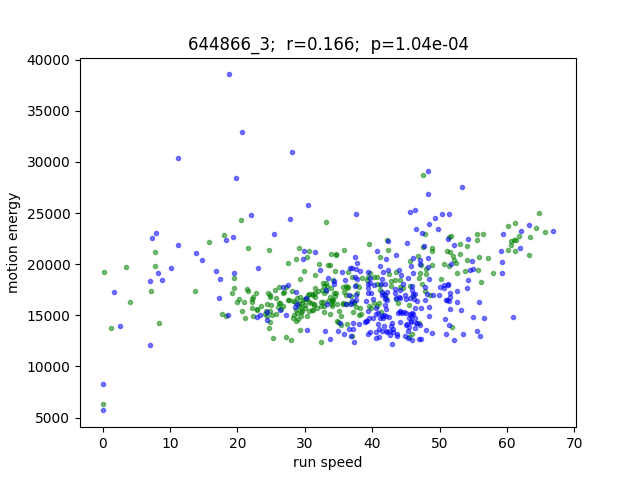

Text(0.5, 1.0, '644866_3;  r=0.166;  p=1.04e-04')

In [131]:
ss=12

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].trials['avg_run_speed'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('run speed')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


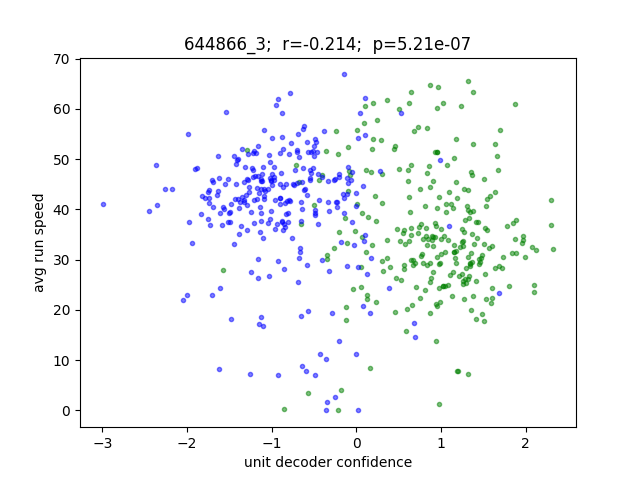

Text(0.5, 1.0, '644866_3;  r=-0.214;  p=5.21e-07')

In [132]:
ss=12

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],sessions[ss].trials['avg_run_speed'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('avg run speed')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


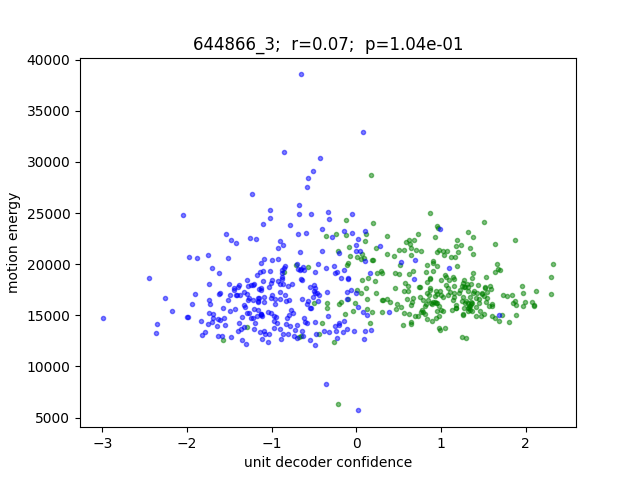

Text(0.5, 1.0, '644866_3;  r=0.07;  p=1.04e-01')

In [133]:
ss=12

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


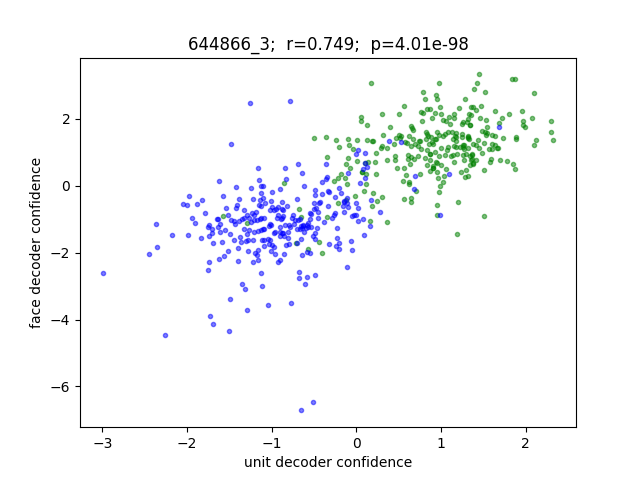

Text(0.5, 1.0, '644866_3;  r=0.749;  p=4.01e-98')

In [128]:
ss=12

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],
                sessions[ss].decoder_face['dec_func'][0]['block_ids'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('face decoder confidence')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


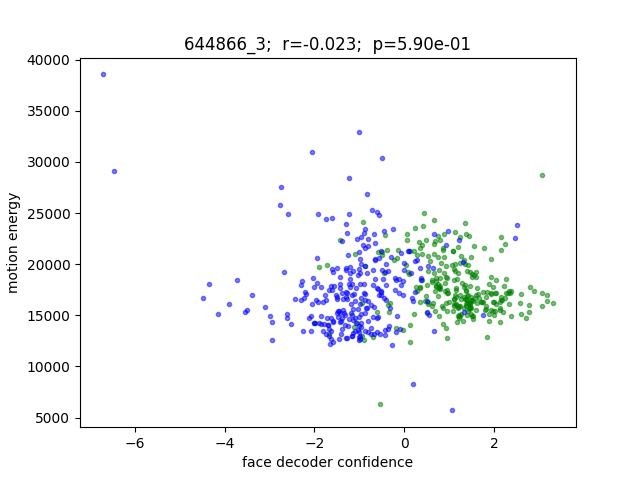

Text(0.5, 1.0, '644866_3;  r=-0.023;  p=5.90e-01')

In [123]:
ss=12

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder_face['dec_func'][0]['block_ids'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('face decoder confidence')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

<IPython.core.display.Javascript object>


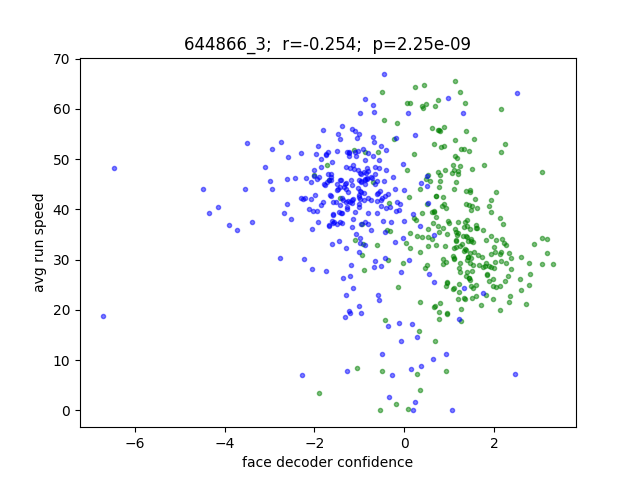

Text(0.5, 1.0, '644866_3;  r=-0.254;  p=2.25e-09')

In [134]:
ss=12

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder_face['dec_func'][0]['block_ids'],sessions[ss].trials['avg_run_speed'])
ax.set_xlabel('face decoder confidence')
ax.set_ylabel('avg run speed')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
# summary of corr btwn run speed and motion energy across trials

In [ ]:
# consistent direction of difference between motion and running?

In [ ]:
# run speed / motion energy on CR vs. FA trials?

# also throw in unit decoder confidence?

In [ ]:
# diff in motion energy and/or running correlate with decoder performance?

In [141]:
# face-decoding CR vs. FA

### plot avg decoder confidence for CR vs. FA for non-rewarded target

aa=0
p='block_ids'
block_type=['vis1','sound1']

vis_block_cr_conf=np.zeros(len(sessions))
vis_block_cr_conf[:]=np.nan
vis_block_fa_conf=np.zeros(len(sessions))
vis_block_fa_conf[:]=np.nan
aud_block_cr_conf=np.zeros(len(sessions))
aud_block_cr_conf[:]=np.nan
aud_block_fa_conf=np.zeros(len(sessions))
aud_block_fa_conf[:]=np.nan

#for each session
for sel_session in range(0,len(svc_results)): #sessions:
    
    if aa not in predict_perf[sel_session].keys():
        continue

    for block in block_type:
        if block=='vis1':
            other_target='aud'
            other_stim = 'sound1'
        elif block=='sound1':
            other_target='vis'
            other_stim='vis1'
        
        
        if 'trialOptoVoltage' in sessions[sel_session].trials.columns:
            temp_trials = sessions[sel_session].trials.query('trialOptoVoltage.isnull()')
        else:
            temp_trials = sessions[sel_session].trials
        
        cr_trials = ((temp_trials['trialstimRewarded'] == block)&
                     (temp_trials['vis_autoreward_trials'] == False)&
                     (temp_trials['aud_autoreward_trials'] == False)&
                     (temp_trials['trialStimID'] == other_stim)&
                     (temp_trials['trial_response'] == False))
                                      
        
        fa_trials = ((temp_trials['trialstimRewarded'] == block)&
                     (temp_trials['vis_autoreward_trials'] == False)&
                     (temp_trials['aud_autoreward_trials'] == False)&
                     (temp_trials['trialStimID'] == other_stim)&
                     (temp_trials['trial_response'] == True))
        
        
        #get decoder confidence
        if len(sessions[sel_session].decoder_face['dec_func'][0])>0:
            
            decoder_cr_pred=((sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][cr_trials])
                              /np.nanstd(sessions[sel_session].decoder_face['dec_func'][0]['block_ids']))

            decoder_fa_pred=((sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][fa_trials])
                              /np.nanstd(sessions[sel_session].decoder_face['dec_func'][0]['block_ids']))



            if block=='vis1':
                vis_block_cr_conf[sel_session]=np.nanmean(decoder_cr_pred)
                vis_block_fa_conf[sel_session]=np.nanmean(decoder_fa_pred)
            elif block=='sound1':
                aud_block_cr_conf[sel_session]=np.nanmean(decoder_cr_pred)
                aud_block_fa_conf[sel_session]=np.nanmean(decoder_fa_pred)



# fig,ax=plt.subplots()

# ax.errorbar([0,1],[np.nanmean(vis_block_cr_conf),np.nanmean(vis_block_fa_conf)],
#            [np.nanstd(vis_block_cr_conf)/np.sqrt(np.sum(~np.isnan(vis_block_cr_conf))),
#             np.nanstd(vis_block_fa_conf)/np.sqrt(np.sum(~np.isnan(vis_block_fa_conf)))],marker='o')

# ax.errorbar([0,1],[np.nanmean(aud_block_cr_conf),np.nanmean(aud_block_fa_conf)],
#            [np.nanstd(aud_block_cr_conf)/np.sqrt(np.sum(~np.isnan(aud_block_cr_conf))),
#             np.nanstd(aud_block_fa_conf)/np.sqrt(np.sum(~np.isnan(aud_block_fa_conf)))],marker='^')

# ax.set_ylim([-1.2,1.2])

# ax.set_xticks([0,1])
# ax.set_xticklabels(['CR','FA'])
# ax.set_xlim(-0.25,1.25)
# ax.set_ylabel('aud context <- norm. decoder confidence -> vis context')

# ax.set_title('non-rewarded target stimulus')
# ax.legend(['vis block (aud stim)','aud block (vis stim)'])




In [142]:
# sessions[sel_session].decoder_face['dec_func'][0]

<IPython.core.display.Javascript object>


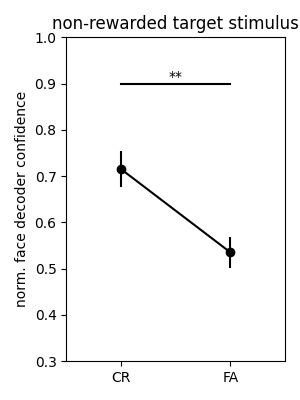

In [147]:
all_block_cr_conf=np.hstack([vis_block_cr_conf[~np.isnan(vis_block_cr_conf)],
                           -aud_block_cr_conf[~np.isnan(aud_block_cr_conf)]])

all_block_fa_conf=np.hstack([vis_block_fa_conf[~np.isnan(vis_block_fa_conf)],
                           -aud_block_fa_conf[~np.isnan(aud_block_fa_conf)]])

h,all_p=st.wilcoxon(all_block_cr_conf,all_block_fa_conf)

fig,ax=plt.subplots(figsize=(3,4))

l1=ax.errorbar(np.asarray([0,1]),[np.nanmean(all_block_cr_conf),np.nanmean(all_block_fa_conf)],
           [np.nanstd(all_block_cr_conf)/np.sqrt(np.sum(~np.isnan(all_block_cr_conf))),
            np.nanstd(all_block_fa_conf)/np.sqrt(np.sum(~np.isnan(all_block_fa_conf)))],marker='o',color='k')

sig_line_pos=0.9

ax.plot([0,1],[sig_line_pos,sig_line_pos],'k')

if all_p<0.001:
    ax.text(0.5,sig_line_pos,'***',ha='center',va='bottom')
elif all_p<0.01:
    ax.text(0.5,sig_line_pos,'**',ha='center',va='bottom')
elif all_p<0.05:
    ax.text(0.5,sig_line_pos,'*',ha='center',va='bottom')
elif all_p>=0.05:
    ax.text(0.5,sig_line_pos,'n.s.',ha='center',va='bottom')
    

ax.set_ylim([0.3,1.0])

ax.set_xticks([0,1])
ax.set_xticklabels(['CR','FA'])
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('norm. face decoder confidence')

ax.set_title('non-rewarded target stimulus')
# ax.legend([l1[0],l2[0]],['vis block (aud stim)','aud block (vis stim)'],loc='lower right')
fig.tight_layout()

In [166]:
sessions[sel_session].trials.keys()

Index(['trialStartFrame', 'trialStimID', 'trialstimRewarded', 'trial_response',
       'trial_rewarded', 'trial_sound_dur', 'trial_vis_stim_dur',
       'vis_go_trials', 'vis_nogo_trials', 'vis_hit_trials',
       'vis_false_alarm_trials', 'vis_miss_trials',
       'vis_correct_reject_trials', 'vis_autoreward_trials', 'aud_go_trials',
       'aud_nogo_trials', 'aud_hit_trials', 'aud_false_alarm_trials',
       'aud_miss_trials', 'aud_correct_reject_trials', 'aud_autoreward_trials',
       'catch_trials', 'catch_resp_trials', 'trialStimStartFrame',
       'stimStartTime', 'stimLatency', 'trial_stim_dur', 'avg_run_speed',
       'vis1_interp', 'sound2_interp', 'sound1_interp', 'vis2_interp',
       'catch_interp', 'cross_modal_dprime', 'intra_modal_dprime',
       'behav_motion', 'behav_SVD_0', 'behav_SVD_1', 'behav_SVD_2',
       'behav_SVD_3', 'behav_SVD_4', 'behav_SVD_5', 'behav_SVD_6',
       'behav_SVD_7', 'behav_SVD_8', 'behav_SVD_9', 'behav_SVD_10',
       'behav_SVD_11', 'behav_S

<IPython.core.display.Javascript object>


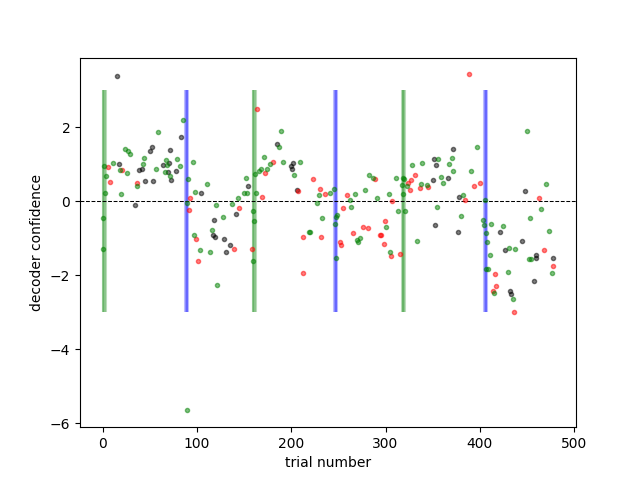

Text(0, 0.5, 'decoder confidence')

In [202]:
sel_session=0
use_face=True

vis_autos=sessions[sel_session].trials.query('vis_autoreward_trials == True').index
aud_autos=sessions[sel_session].trials.query('aud_autoreward_trials == True').index

cr_trials = (
    (sessions[sel_session].trials['trial_response'] == False)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

fa_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

hit_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
))

fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linestyle='--',linewidth=0.75)

ax.vlines(vis_autos,ymin=-3,ymax=3,color='g',alpha=0.25)
ax.vlines(aud_autos,ymin=-3,ymax=3,color='b',alpha=0.25)

if use_face:
    ax.plot(np.where(cr_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][cr_trials],'k.',alpha=0.5)

    ax.plot(np.where(fa_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][fa_trials],'r.',alpha=0.5)

    ax.plot(np.where(hit_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][hit_trials],'g.',alpha=0.5)
else:
    ax.plot(np.where(cr_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][cr_trials],'k.',alpha=0.5)

    ax.plot(np.where(fa_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][fa_trials],'r.',alpha=0.5)

    ax.plot(np.where(hit_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][hit_trials],'g.',alpha=0.5)

ax.set_xlabel('trial number')
ax.set_ylabel('decoder confidence')

In [201]:
sessions[sel_session].trials.query('vis_autoreward_trials == True')

,trialStartFrame,trialStimID,trialstimRewarded,trial_response,trial_rewarded,trial_sound_dur,trial_vis_stim_dur,vis_go_trials,vis_nogo_trials,vis_hit_trials,...,behav_SVD_40,behav_SVD_41,behav_SVD_42,behav_SVD_43,behav_SVD_44,behav_SVD_45,behav_SVD_46,behav_SVD_47,behav_SVD_48,behav_SVD_49
0,0,vis1,vis1,True,True,0.0,0.5,True,False,False,...,-1.171152,-0.738461,0.527509,4.096450,-5.658583,-4.077276,8.070247,-3.219794,1.220343,-0.716497
1,674,vis1,vis1,True,True,0.0,0.5,True,False,False,...,5.553611,2.941084,2.200411,7.351409,4.523940,-1.028104,9.616808,2.297972,2.882969,-0.554476
2,1044,vis1,vis1,True,True,0.0,0.5,True,False,False,...,3.072236,0.086831,-7.270326,8.398885,-2.542543,-4.022533,-2.924599,14.623571,3.190232,0.877138
3,1438,vis1,vis1,True,True,0.0,0.5,True,False,False,...,-4.376968,0.041293,-3.601000,3.615339,3.558024,-1.722496,2.680279,7.015117,-0.003896,4.091556
4,1841,vis1,vis1,True,True,0.0,0.5,True,False,False,...,1.447036,1.187551,0.705691,-2.276413,-1.205010,-1.189056,3.112452,3.382101,3.315306,-1.206227
159,72436,vis1,vis1,True,True,0.0,0.5,True,False,False,...,-2.421087,-4.247348,-15.578469,3.820623,-3.290165,5.231014,-0.782286,0.486300,-2.627679,-7.163953
160,73425,vis1,vis1,True,True,0.0,0.5,True,False,False,...,-0.692918,-1.060139,-2.996718,5.915251,-2.264589,-4.622734,-2.574379,8.751042,5.230870,-4.625557
161,73759,vis1,vis1,True,True,0.0,0.5,True,False,False,...,5.390667,4.343139,-0.766081,6.773097,-7.871081,2.360942,-3.373294,12.610692,7.204939,-1.529519
162,74117,vis1,vis1,True,True,0.0,0.5,True,False,False,...,-4.035699,3.942091,-0.271750,-3.844698,2.071598,-0.756066,7.329780,6.402505,-0.892783,2.900297
163,74685,vis1,vis1,True,True,0.0,0.5,True,False,False,...,-1.453247,0.509607,-3.877412,0.560067,-0.089233,-1.492018,2.731905,4.539860,1.926310,-1.495701


<IPython.core.display.Javascript object>


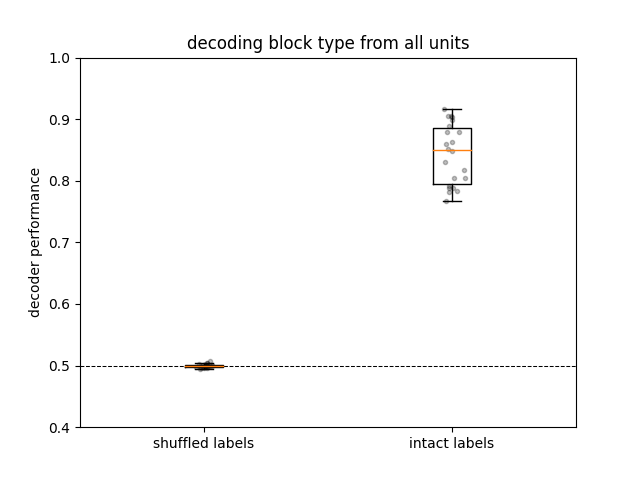

Text(0.5, 1.0, 'decoding block type from all units')

In [199]:
decoder_perf = np.nanmean(np.vstack([decoder_acc_session_mean['all']['block_ids']['vis1'],
                              decoder_acc_session_mean['all']['block_ids']['sound1']]),axis=0)
decoder_shuffle_perf = np.nanmean(np.vstack([decoder_acc_session_shuffle_mean['all']['block_ids']['vis1'],
                                      decoder_acc_session_shuffle_mean['all']['block_ids']['sound1']]),axis=0)

decoder_perf=decoder_perf[~np.isnan(decoder_perf)]
decoder_shuffle_perf=decoder_shuffle_perf[~np.isnan(decoder_shuffle_perf)]

fig,ax=plt.subplots(1,1)
ax.axhline(0.5,color='k',linestyle='--',linewidth=0.75)
ax.boxplot([decoder_shuffle_perf,decoder_perf],showfliers=False)

x = np.random.normal(1, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_shuffle_perf,'k.',alpha=0.25)

x = np.random.normal(2, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_perf,'k.',alpha=0.25)

ax.set_ylim([0.4,1])
ax.set_ylabel('decoder performance')
ax.set_xticks([1,2])
ax.set_xticklabels(['shuffled labels','intact labels'])
ax.set_title('decoding block type from all units')

In [223]:
# set paths & load data

mm = main_paths[20]

behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
cam_frames_path = os.path.join(mm,"camera_frames.pkl")
trials_path = os.path.join(mm,"trials_table.csv")
metadata_path = os.path.join(mm,"metadata.pkl")

trials=pd.read_csv(trials_path)
behav_info=np.load(behav_path,allow_pickle=True)
with open(cam_frames_path, 'rb') as filepath:
    cam_frames=pickle.load(filepath)

with open(metadata_path, 'rb') as handle:
    metadata = pickle.load(handle)

In [204]:
behav_info.item().keys()

dict_keys(['filenames', 'save_path', 'Ly', 'Lx', 'sbin', 'fullSVD', 'save_mat', 'Lybin', 'Lxbin', 'sybin', 'sxbin', 'LYbin', 'LXbin', 'avgframe', 'avgmotion', 'avgframe_reshape', 'avgmotion_reshape', 'motion', 'motSv', 'movSv', 'motMask', 'movMask', 'motMask_reshape', 'movMask_reshape', 'motSVD', 'movSVD', 'pupil', 'running', 'blink', 'rois', 'sy', 'sx'])

In [205]:
behav_info.item()['motion'][1]

array([10626., 10833.,  7790., ..., 11686., 30754., 28318.], dtype=float32)

In [206]:
behav_info.item()['motMask_reshape'][1].shape

(61, 99, 500)

In [207]:
behav_info.item()['motSVD'][1].shape

(288926, 500)

<IPython.core.display.Javascript object>


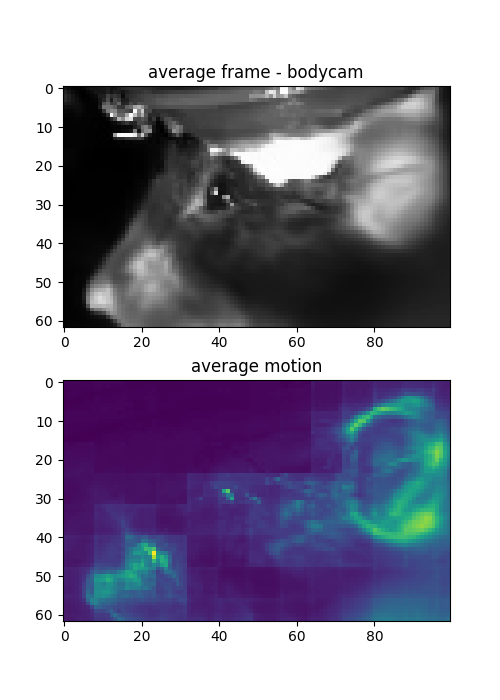

Text(0.5, 1.0, 'average motion')

In [208]:
fig,ax=plt.subplots(2,1,figsize=(5,7))

ax[0].imshow(behav_info.item()['avgframe_reshape'],cmap='gray')
ax[0].set_title('average frame - bodycam')

ax[1].imshow(behav_info.item()['avgmotion_reshape'])
ax[1].set_title('average motion')

In [229]:
# get trial-wise SVD features

# 2 sec before + after stimulus onset
time_before=2
time_after=2
fps=60

behav_SVD_by_trial = np.zeros(((time_before+time_after)*fps,20,len(trials)))
behav_motion_by_trial = np.zeros(((time_before+time_after)*fps,len(trials)))

for tt,stimStartTime in enumerate(trials['stimStartTime']):
    stim_start_frame=np.where(cam_frames['behavior']>=stimStartTime)[0][0]
    trial_start_frame=stim_start_frame-time_before*fps
    trial_end_frame=stim_start_frame+time_before*fps
    
    behav_SVD_by_trial[:,:,tt]=behav_info.item()['motSVD'][1][trial_start_frame:trial_end_frame,:20]    
    behav_motion_by_trial[:,tt] = behav_info.item()['motion'][1][trial_start_frame:trial_end_frame]
    
mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=2)
t_points=np.arange(-time_before,time_after,1/fps)


#average within vis vs. aud blocks
#SVD
vis_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],axis=2)
aud_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],axis=2)

vis_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],
                                  nan_policy='omit',axis=2)
aud_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],
                                  nan_policy='omit',axis=2)

#absolute motion
vis_block_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialstimRewarded']=='vis1'],axis=1)
aud_block_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialstimRewarded']=='sound1'],axis=1)

vis_block_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialstimRewarded']=='vis1'],
                                  nan_policy='omit',axis=1)
aud_block_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialstimRewarded']=='sound1'],
                                  nan_policy='omit',axis=1)


#average across stimuli regardless of block
#SVD
vis1_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis1'],axis=2)
vis2_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis2'],axis=2)
sound1_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound1'],axis=2)
sound2_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound2'],axis=2)

vis1_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis1'],axis=2)
vis2_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis2'],axis=2)
sound1_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound1'],axis=2)
sound2_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound2'],axis=2)

#absolute motion
vis1_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='vis1'],axis=1)
vis2_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='vis2'],axis=1)
sound1_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='sound1'],axis=1)
sound2_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='sound2'],axis=1)

vis1_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='vis1'],axis=1)
vis2_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='vis2'],axis=1)
sound1_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='sound1'],axis=1)
sound2_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='sound2'],axis=1)



#average across stimuli, vis block
vis_block_trials = trials['trialstimRewarded']=='vis1'
aud_block_trials = trials['trialstimRewarded']=='sound1'

#SVD

#absolute motion - vis block
vis1_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound2')],axis=1)

#aud block
vis1_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound2')],axis=1)

In [ ]:
# behav_info.item()['motion']

<IPython.core.display.Javascript object>


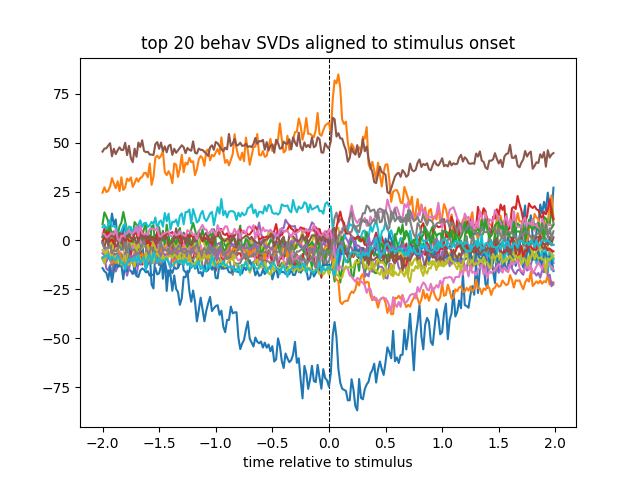

Text(0.5, 1.0, 'top 20 behav SVDs aligned to stimulus onset')

In [210]:
fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.plot(t_points,mean_trial_behav_SVD)
ax.set_xlabel('time relative to stimulus')
ax.set_title('top 20 behav SVDs aligned to stimulus onset')

<IPython.core.display.Javascript object>


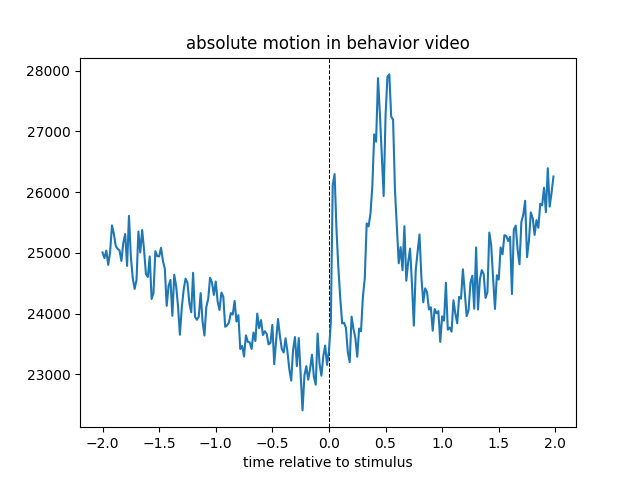

Text(0.5, 1.0, 'absolute motion in behavior video')

In [211]:
fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.plot(t_points,np.mean(behav_motion_by_trial,1))
ax.set_xlabel('time relative to stimulus')
ax.set_title('absolute motion in behavior video')

<IPython.core.display.Javascript object>


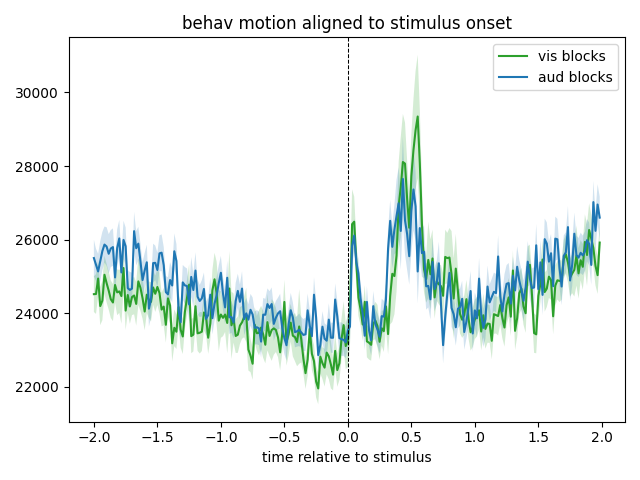

In [212]:
fig,ax=plt.subplots(1,1)

y=vis_block_behav_motion
err=vis_block_behav_motion_sem
ax.plot(t_points, y, 'tab:green')
plt.fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=aud_block_behav_motion
err=aud_block_behav_motion_sem
ax.plot(t_points, y, 'tab:blue')
plt.fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax.legend(['vis blocks','aud blocks'])
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.set_xlabel('time relative to stimulus')
ax.set_title('behav motion aligned to stimulus onset')

fig.tight_layout()

<IPython.core.display.Javascript object>


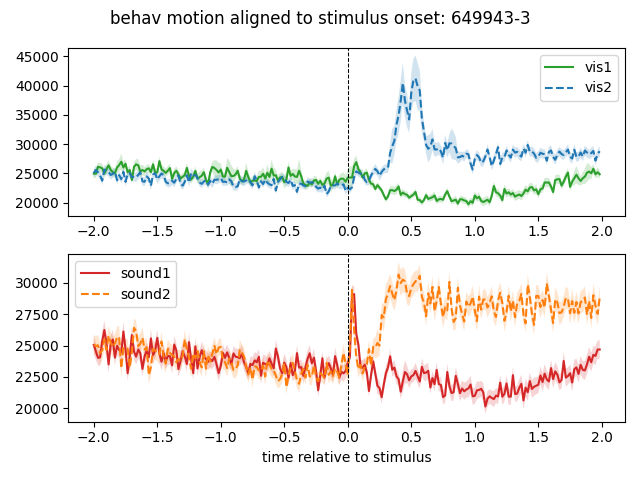

In [228]:
fig,ax=plt.subplots(2,1)

y=vis1_behav_motion
err=vis1_behav_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_behav_motion
err=vis2_behav_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_behav_motion
err=sound1_behav_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_behav_motion
err=sound2_behav_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

<IPython.core.display.Javascript object>


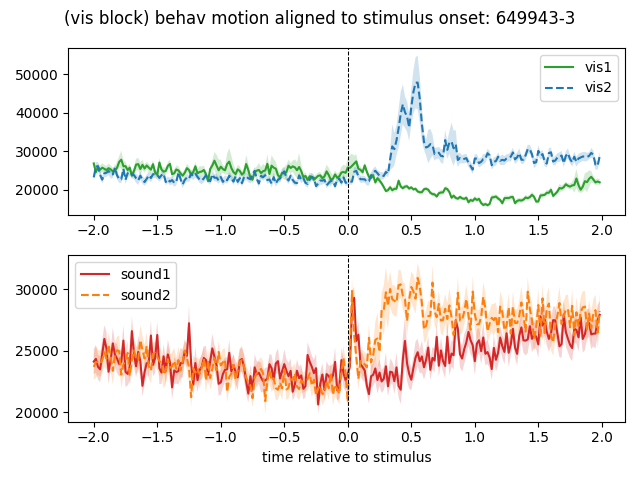

In [231]:
fig,ax=plt.subplots(2,1)

y=vis1_vis_motion
err=vis1_vis_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_vis_motion
err=vis2_vis_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_vis_motion
err=sound1_vis_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_vis_motion
err=sound2_vis_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('(vis block) behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

<IPython.core.display.Javascript object>


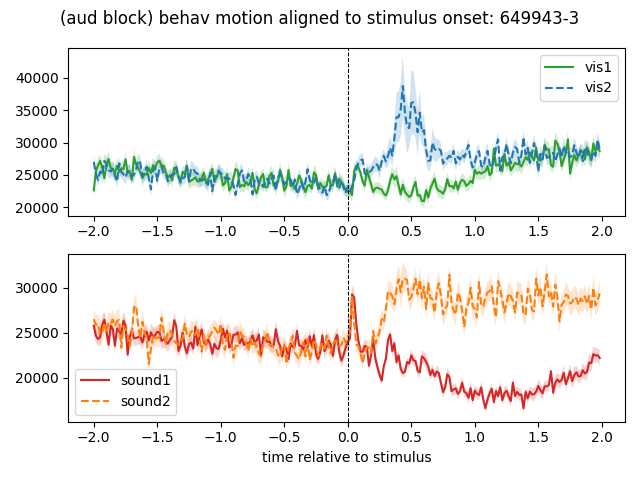

In [232]:
fig,ax=plt.subplots(2,1)

y=vis1_aud_motion
err=vis1_aud_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_aud_motion
err=vis2_aud_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_aud_motion
err=sound1_aud_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_aud_motion
err=sound2_aud_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('(aud block) behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [ ]:
sel_feature=0

for sel_feature in range(0,20):

    fig,ax=plt.subplots(1,2,figsize=(10,3.5))

    y=vis_block_behav_SVD[:,sel_feature]
    err=vis_block_behav_SVD_sem[:,sel_feature]
    ax[0].plot(t_points, y, 'tab:green')
    ax[0].fill_between(t_points, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor='tab:green')

    y=aud_block_behav_SVD[:,sel_feature]
    err=aud_block_behav_SVD_sem[:,sel_feature]
    ax[0].plot(t_points, y, 'tab:blue')
    ax[0].fill_between(t_points, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor='tab:blue')

    # ax[0].plot(t_points,vis_block_behav_SVD[:,sel_feature],'tab:green')
    # ax[0].plot(t_points,aud_block_behav_SVD[:,sel_feature],'tab:blue')
    ax[0].legend(['vis blocks','aud blocks'])
    ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
    ax[0].set_xlabel('time relative to stimulus')
    ax[0].set_title('behav SVD '+str(sel_feature)+' aligned to stimulus onset')


    ax[1].imshow(behav_info.item()['motMask_reshape'][0][:,:,sel_feature])
    ax[1].set_title('motMask_reshape for behav SVD '+str(sel_feature))
    fig.tight_layout()

#     figname='behav_SVD_'+str(sel_feature)+'.png'
#     plt.savefig(os.path.join(fig_save_path,figname), dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png', transparent=True, bbox_inches='tight', 
#                 pad_inches=0.1, metadata=None)


In [ ]:
# compare motion / SVDs with running

# also compare with decoding from neural activity

In [ ]:
# try to decode context with running or motion/SVDs